# Lab | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.
Instructions

  1  Import the necessary libraries if you are starting a new notebook.  
  2  Load the continuous and discrete variables into continuous_df and discrete_df variables.  
  3  Plot a correlation matrix, what can you see?  
  4  Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).  
  5  What can you see in the plots?  
  6  Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.  
  7  Have you found outliers? If you have, what should we do with them?  
  8  Check nan values per column.  
  9  Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.  
  10 for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.  
  11 Get categorical features.  
  12 What should we do with the customer id column?
  


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv') 

In [5]:
display(data.head())
display(data.columns)
display(len(data['Customer'].value_counts()))

for col in data.columns:
    print(col,": ", len(data[col].value_counts()))

#display(data[col].unique())
#display(len(data[col].value_counts()))

#data.value_counts()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

9134

Customer :  9134
State :  5
Customer Lifetime Value :  8041
Response :  2
Coverage :  3
Education :  5
Effective To Date :  59
EmploymentStatus :  5
Gender :  2
Income :  5694
Location Code :  3
Marital Status :  3
Monthly Premium Auto :  202
Months Since Last Claim :  36
Months Since Policy Inception :  100
Number of Open Complaints :  6
Number of Policies :  9
Policy Type :  3
Policy :  9
Renew Offer Type :  4
Sales Channel :  4
Total Claim Amount :  5106
Vehicle Class :  6
Vehicle Size :  3


In [6]:
# let's convert the customer ID to the index
data.set_index('Customer',inplace=True)
display(data.head())

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
display(data.columns)

data.rename(columns = {'Customer':'customer', 'State':'state', 'Customer Lifetime Value':'customer_lifetime_value', 'Response':'response', 'Coverage':'coverage',
       'Education':'education', 'Effective To Date':'effective_to_date', 'EmploymentStatus':'employment_status', 'Gender':'gender',
       'Income':'income', 'Location Code':'location_code', 'Marital Status':'marital_status', 'Monthly Premium Auto':'monthly_premium_auto',
       'Months Since Last Claim':'months_since_last_claim', 'Months Since Policy Inception':'months_since_policy_inception',
       'Number of Open Complaints':'number_of_open_complaints', 'Number of Policies':'number_of_policies', 'Policy Type':'policy_type',
       'Policy':'policy', 'Renew Offer Type':'renew_offer_type', 'Sales Channel':'sales_channel', 'Total Claim Amount':'total_claim_amount',
       'Vehicle Class':'vehicle_class', 'Vehicle Size':'vehicle_size'}, inplace = True) 

display(data.columns)

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [8]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])

data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          9134 non-null   object        
 1   customer_lifetime_value        9134 non-null   float64       
 2   response                       9134 non-null   object        
 3   coverage                       9134 non-null   object        
 4   education                      9134 non-null   object        
 5   effective_to_date              9134 non-null   datetime64[ns]
 6   employment_status              9134 non-null   object        
 7   gender                         9134 non-null   object        
 8   income                         9134 non-null   int64         
 9   location_code                  9134 non-null   object        
 10  marital_status                 9134 non-null   object        
 11  monthly_premi

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# 2  Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [9]:
# Let's select all the features that are numerical first
#numerical = data.select_dtypes([np.number,np.datetime64])
numerical = data.select_dtypes([np.number])
display(numerical)
display(numerical.info())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
Customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
LA72316,23405.987980,71941,73,18,89,0,2,198.234764
PK87824,3096.511217,21604,79,14,28,0,1,379.200000
TD14365,8163.890428,0,85,9,37,3,2,790.784983


<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 642.2+ KB


None

In [10]:
# Remember that discrete data is represented by exact values that result from counting, as in the number of people in the households in your neighborhood. 
# Continuous data is represented by a range of data that results from measuring. 

def select_cont_discrete(data):
    #let's select continuous or discrete data
    continuous = data.select_dtypes(['float64','datetime64'])
    discrete = data.select_dtypes('int64')
    return continuous, discrete;

continuous, discrete = select_cont_discrete(numerical)
display("continuous: ",continuous)
display("discrete: ",discrete)

'continuous: '

,customer_lifetime_value,total_claim_amount
Customer,,
BU79786,2763.519279,384.811147
QZ44356,6979.535903,1131.464935
AI49188,12887.431650,566.472247
WW63253,7645.861827,529.881344
HB64268,2813.692575,138.130879
...,...,...
LA72316,23405.987980,198.234764
PK87824,3096.511217,379.200000
TD14365,8163.890428,790.784983


'discrete: '

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
Customer,,,,,,
BU79786,56274,69,32,5,0,1
QZ44356,0,94,13,42,0,8
AI49188,48767,108,18,38,0,2
WW63253,0,106,18,65,0,7
HB64268,43836,73,12,44,0,1
...,...,...,...,...,...,...
LA72316,71941,73,18,89,0,2
PK87824,21604,79,14,28,0,1
TD14365,0,85,9,37,3,2


 # 3  Plot a correlation matrix, what can you see?  

In [11]:
numerical.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [12]:
# Customer_lifetime_value and total claim amount are somewhat correlated (0.23)
# but correlation is higher between income and total claim amount
# and monthly_premium_auto and total claim amount they are very strongly correlated.

# 4 Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).


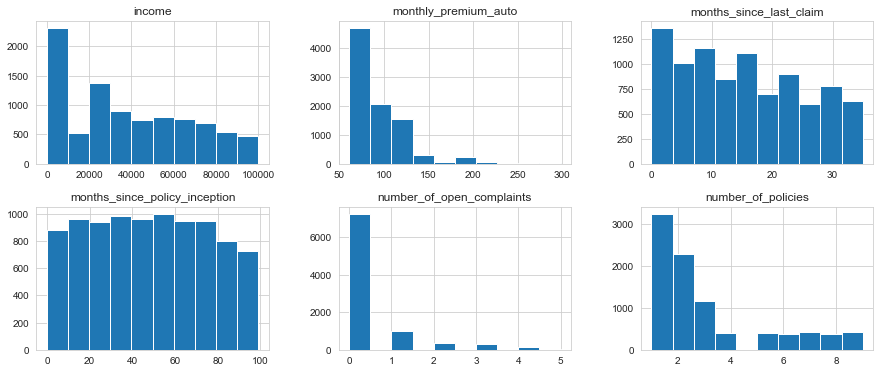

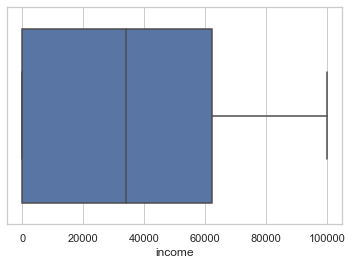

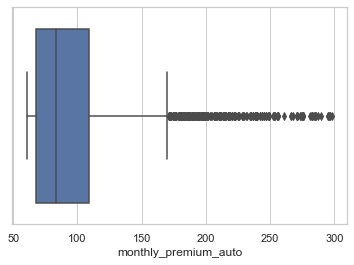

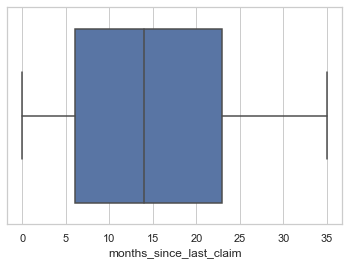

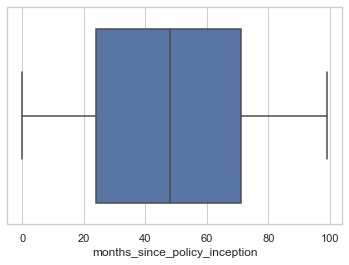

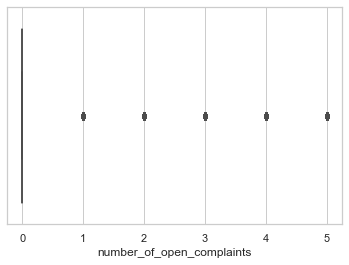

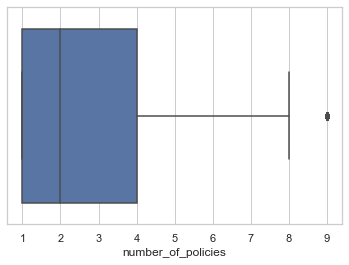

In [13]:
def plot_discrete(df):
    df.hist(figsize=(15,30),layout=(9,3)) 
    sns.set_theme(style="whitegrid")
    plt.show()
    for col in df.columns:
        sns.boxplot(x=df[col])
        plt.show()
plot_discrete(discrete)
    

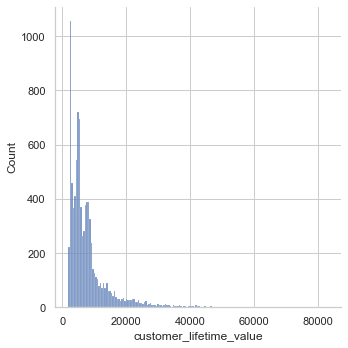

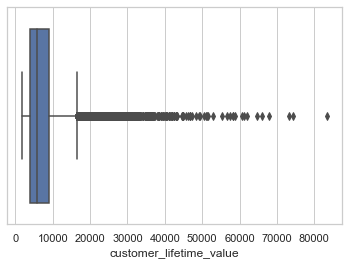

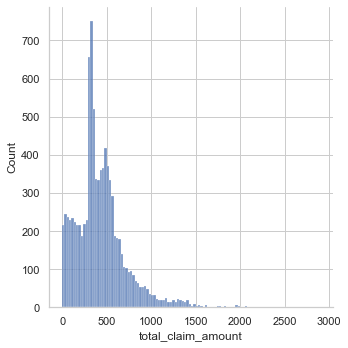

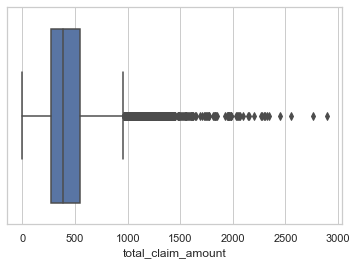

In [14]:
def plot_continuous(df):
    sns.set_theme(style="whitegrid")
    for col in df.columns:
        sns.displot(data=df[col]) 
        plt.show()
        sns.boxplot(x=df[col])
        plt.show()
plot_continuous(continuous)

# 5 What can you see in the plots?


# 6 Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

# 7 Have you found outliers? If you have, what should we do with them?


# 8 Check nan values per column.


# 9 Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.


# 10 for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
# 11 Get categorical features.
# 12 What should we do with the customer id column?

# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.
Instructions

    1. Open the categoricals variable we created before.

categoricals = data.select_dtypes(np.object)
categoricals.head()

    2. Plot all the categorical variables with the proper plot. What can you see?
    3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
    4. Plot time variable. Can you extract something from it?


In [16]:
categorical = data.select_dtypes(np.object)

display(categorical)

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize


# 2. Plot all the categorical variables with the proper plot. What can you see?

In [43]:
sns.__version__

'0.11.0'

state :


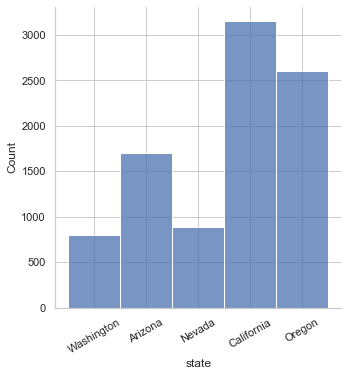

<Figure size 900x450 with 0 Axes>

response :


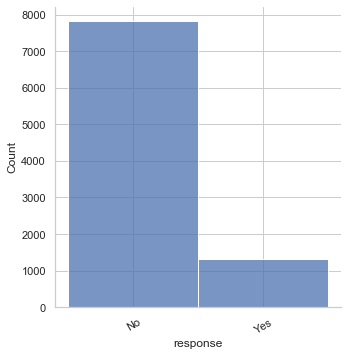

<Figure size 900x450 with 0 Axes>

coverage :


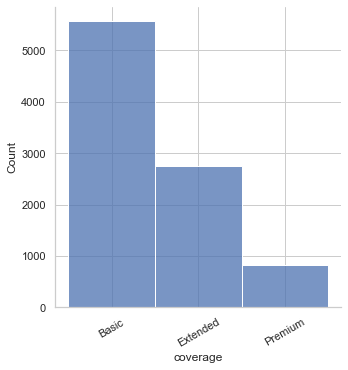

<Figure size 900x450 with 0 Axes>

education :


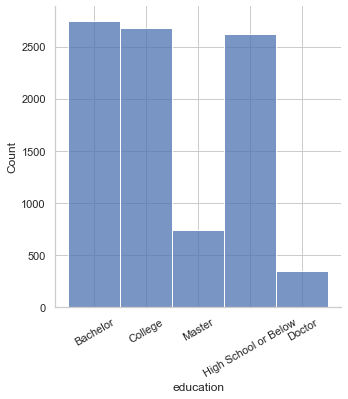

<Figure size 900x450 with 0 Axes>

employment_status :


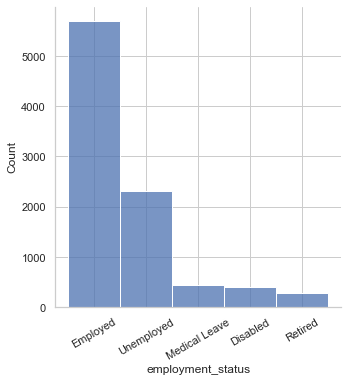

<Figure size 900x450 with 0 Axes>

gender :


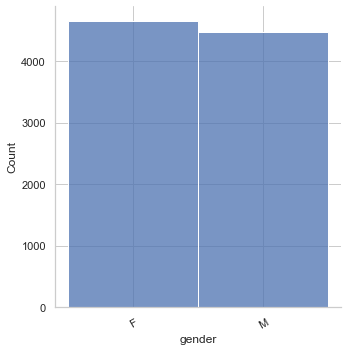

<Figure size 900x450 with 0 Axes>

location_code :


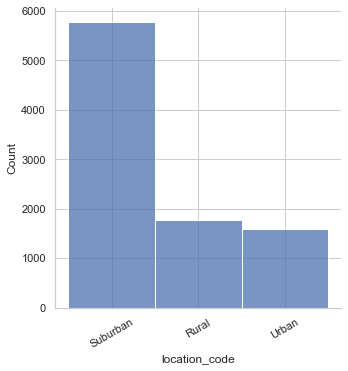

<Figure size 900x450 with 0 Axes>

marital_status :


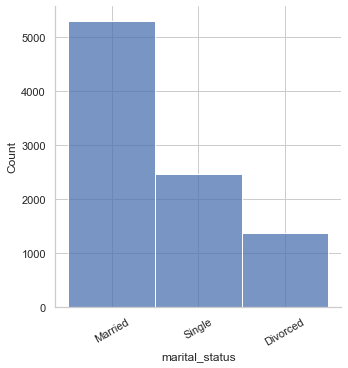

<Figure size 900x450 with 0 Axes>

policy_type :


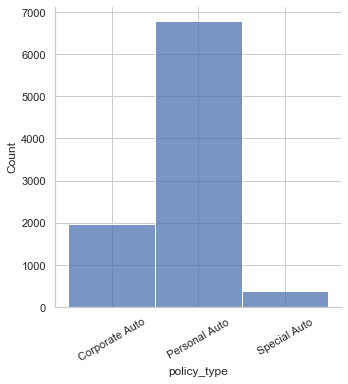

<Figure size 900x450 with 0 Axes>

policy :


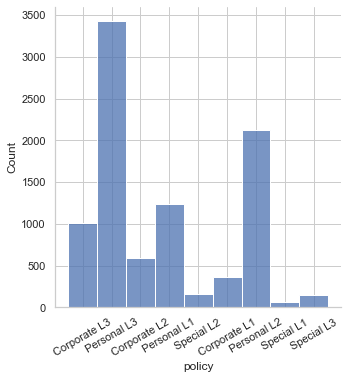

<Figure size 900x450 with 0 Axes>

renew_offer_type :


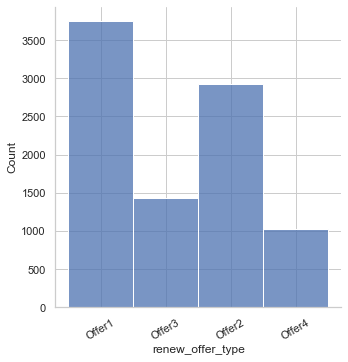

<Figure size 900x450 with 0 Axes>

sales_channel :


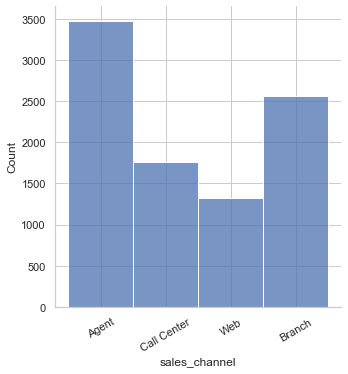

<Figure size 900x450 with 0 Axes>

vehicle_class :


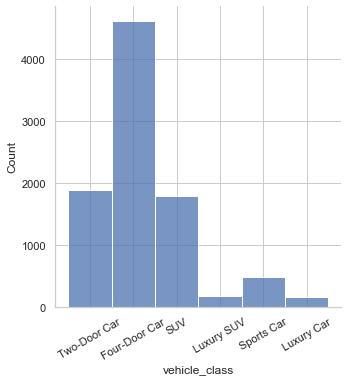

<Figure size 900x450 with 0 Axes>

vehicle_size :


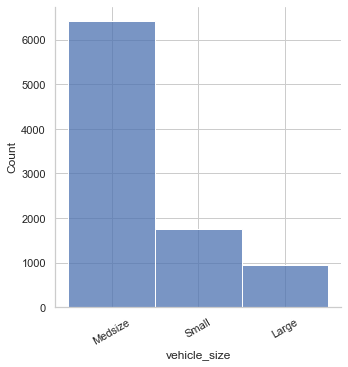

<Figure size 900x450 with 0 Axes>

In [46]:
def plot_categorical(df):
    #sns.set_theme(style="whitegrid")
    for col in df.columns:
        print(col,":")
        ax = sns.displot(data=df[col])
        ax.set_xticklabels(rotation=30)
        #sns.barplot(x=df[col],y=df.index, data = df[col])
        plt.figure(figsize=(6,3), dpi=150)
        plt.show()
plot_categorical(categorical)

# 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [ ]:
#some of them are equally splitted, so I don't think they are going to add value for the analysis so, I would drop them